## 1. The k-means clustering algorithm

聚类问题是一种 **「无监督学习(unsupervised learning)」** ，给定训练集 $\{x^{(1)},...,x^{(m)}\}$，我们希望将其聚合成几个特定的类。k-means 聚类算法的流程如下：

1. 随机初始化 **「聚类中心(cluster centroids)」** $\mu_1,\mu_2,...,\mu_k \in\mathbb R^n$

2. 重复以下步骤直至收敛： 对于每个 $i$（训练集大小），令 $c^{(i)}:=\underset{j}{\text{argmin}}{\parallel x^{(i)}-\mu_j \parallel}^2$ ,对于每个 $j$（聚类数量），令

$$\mu^{(j)}:=\frac{\sum_{i=1}^m 1 \{ c^{(i)}=j\}x^{(i)}}{\sum_{i=1}^m 1\{ c^{(i)}=j\}}$$

该算法的思想为：先将每个训练样本 $x^{(i)}$ 分配到距离其最近的中心 $\mu_j$，再将每个聚类中心移动到第一步中分配到该中心的样本的均值。

下图可视化了 k-means 算法的运行流程：

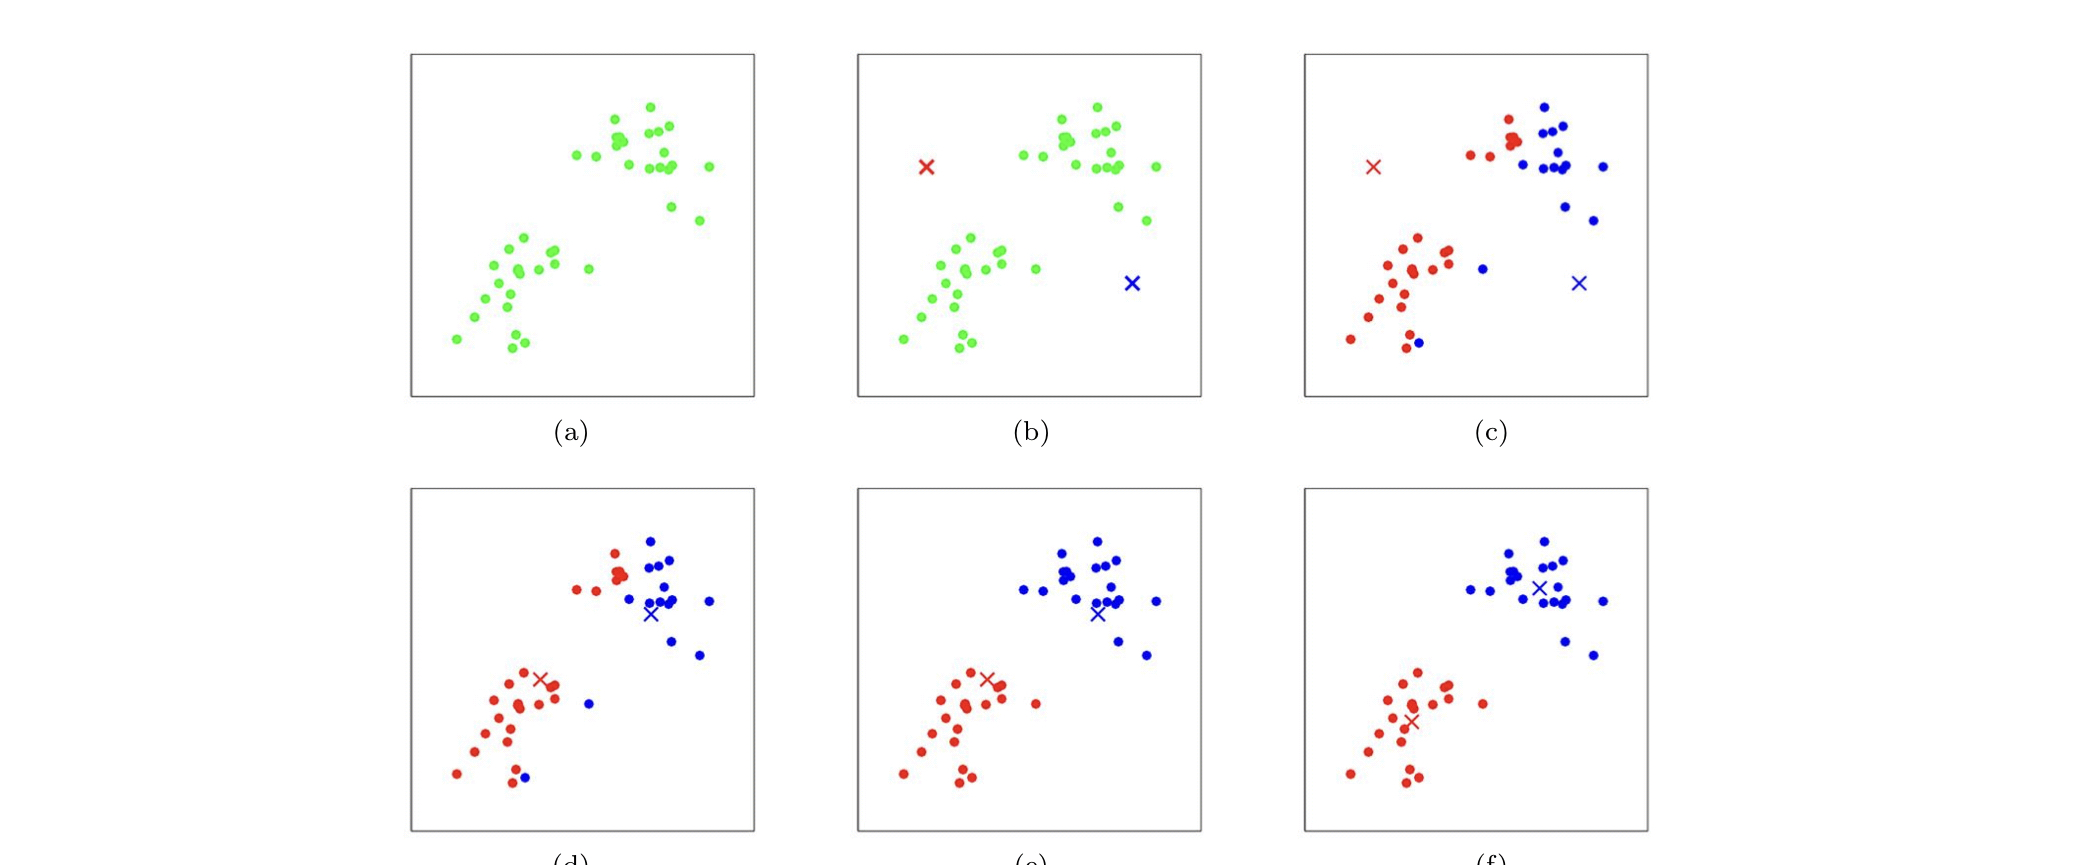

为了证明 k-means 算法能否保证收敛，我们定义 **「失真函数(distortion function)」** 为：

$$J(c,\mu)=\sum_{i=1}^m {\parallel x^{(i)}-\mu_{c^{(i)}}\parallel}^2$$

可以发现 k-means 本质上就是对失真函数进行坐标上升法优化：其内层循环首先保持 $\mu$ 不变关于 $c$ 最小化 $J$，然后保持 $c$ 不变关于 $\mu$ 最小化 $J$。因此，$J$ 一定会持续下降，最终达到收敛。一般 $c$ 和 $\mu$ 也会收敛，但理论上存在同时出现多种聚类组合的可能性，使得失真函数的值一样。

失真函数是一个非凸函数，这意味着坐标上升并不能保证其收敛至全局最优，存在收敛到局部最优的可能性。一般情况下这不会发生，可以通过多次运行 k-means 算法，选择最优解来解决这个问题。